# Experimentation with the SIS-SIS phase transition 

### Importing packages

In [1]:
import dynalearn as dl
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

epsilon = 1e-3
def absorbing_state(mf):
    x = np.ones(mf.array_shape).astype(mf.dtype) * epsilon
    x[0] = 1
    x = mf.normalize_state(x)
    return x.reshape(-1)


def epidemic_state(mf):
    x = np.ones(mf.array_shape).astype(mf.dtype) * epsilon
    x[0] = 1
    x = 1 - x
    x = mf.normalize_state(x)
    return x.reshape(-1)


def generic_state(mf, s):
    x = np.ones(mf.array_shape).astype(mf.dtype) * epsilon
    x[s] = 1
    x = mf.normalize_state(x)
    return x.reshape(-1)

In [2]:
N = 1000
avgk = np.linspace(0.1, 5, 40)
tau = (0.04, 0.03)
gamma = (0.08, 0.1)
zeta = 5

In [3]:
def discontinuous_threshold(mf, k0, k1, init_state, tol=1e-3, verbose=0):
    diff = k1 - k0
    s = 1
    data = []
    while diff > tol:
        k = (k1 + k0) / 2
        if verbose:
            print("k = {0}, diff = {1}, s = {2}".format(k, diff, s))
        p_k = dl.meanfields.poisson_distribution(k, num_k=5)
        mf.p_k = p_k
        s = mf.to_avg(mf.search_fixed_point(x0=init_state))[0]
        data.append((k, s))
        if s > 1 - 1e-2:
            k0 = k
        else:
            k1 = k
        
        diff = k1 - k0
        
    return k

In [10]:
p_k = dl.meanfields.poisson_distribution(5, num_k=5)
mf = dl.meanfields.SISSIS_MF(p_k, tau, gamma, zeta, verbose=0)

# threshold1 = discontinuous_threshold(mf, 0.1, 3, epidemic_state(mf), tol=1e-3, verbose=1)
threshold2 = discontinuous_threshold(mf, 0.1, 5, absorbing_state(mf), tol=1e-3, verbose=1)

k = 2.55, diff = 4.9, s = 1
k = 1.325, diff = 2.4499999999999997, s = 0.09480673742711627
k = 0.7125, diff = 1.2249999999999999, s = 0.2087082294166063
k = 1.01875, diff = 0.6124999999999999, s = 0.995625256702871
k = 1.171875, diff = 0.3062499999999999, s = 0.9945997601980845
k = 1.2484375, diff = 0.15312499999999996, s = 0.9937181792387428
k = 1.21015625, diff = 0.07656250000000009, s = 0.9393980094385304
k = 1.2292968750000002, diff = 0.038281250000000044, s = 0.9933668530510014
k = 1.2388671875000001, diff = 0.01914062499999991, s = 0.9931126666084857
k = 1.24365234375, diff = 0.009570312499999956, s = 0.9929119896462356
k = 1.2412597656250002, diff = 0.004785156249999867, s = 0.9408212611011654
k = 1.2424560546875, diff = 0.0023925781249998224, s = 0.9928273856586571
k = 1.24305419921875, diff = 0.0011962890624999112, s = 0.9927518995387746


In [11]:
N = 1000
avgk = np.linspace(0.1, 5, 20)
# avgk = np.array([0.1])
# tau = 0.04
# gamma = 0.08
tau = (0.04, 0.03)
gamma = (0.08, 0.1)
zeta = 5

compute_stability = True
low_s = np.zeros(avgk.shape)
high_s = np.zeros(avgk.shape)
stability = np.zeros(avgk.shape)



for i, k in enumerate(avgk):
    print("k = {0}".format(k))
    if k < 1.5:
        p_k = dl.meanfields.poisson_distribution(k, num_k=5)
    else:
        p_k = dl.meanfields.poisson_distribution(k, num_k=4)
    mf.p_k = p_k
    low_s[i] = mf.to_avg(mf.search_fixed_point(x0=absorbing_state(mf)))[0]
    high_s[i] = mf.to_avg(mf.search_fixed_point(x0=epidemic_state(mf)))[0]



k = 0.1
k = 0.35789473684210527
k = 0.6157894736842106
k = 0.8736842105263158
k = 1.1315789473684212
k = 1.3894736842105266
k = 1.6473684210526318
k = 1.905263157894737
k = 2.1631578947368424
k = 2.421052631578948
k = 2.678947368421053
k = 2.936842105263158
k = 3.1947368421052635
k = 3.452631578947369
k = 3.710526315789474
k = 3.9684210526315793
k = 4.226315789473684
k = 4.484210526315789
k = 4.742105263157895
k = 5.0


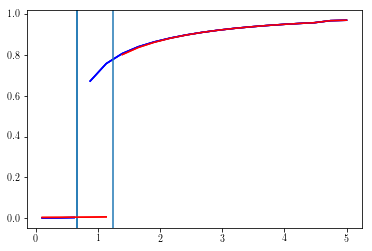

In [16]:
plt.plot(avgk[avgk < threshold1], 1 - high_s[avgk <threshold1], 'b-')
plt.plot(avgk[avgk > threshold1], 1 - high_s[avgk >threshold1], 'b-')
plt.axvline(threshold1, linestyle='--', )

plt.plot(avgk[avgk < threshold2], 1 - low_s[avgk <threshold2], 'r-')
plt.plot(avgk[avgk > threshold2], 1 - low_s[avgk >threshold2], 'r-')
plt.axvline(threshold2)

plt.show()

In [63]:
diff = low_s - high_s
# plt.plot(avgk, diff)
# plt.show()
end1 = np.where(avgk == avgk[np.abs(diff) > 1e-1][0])[0][0]
end2 = np.where(avgk == avgk[np.abs(diff) > 1e-1][-1])[0][0] + 1
print(end1, end2)

NameError: name 'low_s' is not defined

In [62]:
plt.plot(avgk[:end2], 1 - low_s[:end2], 'r-')
plt.plot(avgk[end2-1: end2+1], 1 - low_s[end2-1: end2+1], 'r--')
plt.plot(avgk[end2:], 1 - low_s[end2:], 'r-')
plt.plot(avgk[:end1], 1 - high_s[:end1], 'b-')
plt.plot(avgk[end1-1: end1+1], 1 - high_s[end1-1: end1+1], 'b--')
plt.plot(avgk[end1:], 1 - high_s[end1:], 'b-')
plt.ylim([-0.1,1])
plt.ylabel(r'Fraction of infected nodes', fontsize=14)
plt.xlabel(r'Average degree $[\langle k \rangle]$', fontsize=14)
plt.savefig(f'./coupling_{zeta}.png')
plt.show()

NameError: name 'end2' is not defined